<a href="https://www.kaggle.com/code/pawkrupa/capstone-pk-mak?scriptVersionId=234597279" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

```markdown
# Multi-Style Book Summarization with RAG and GenAI Evaluation

## Overview

This project provides a Python script designed to process an EPUB book, summarize its chapters using different stylistic prompts ("child", "concise", "poetic"), and compare the effectiveness of standard ("vanilla") Large Language Model (LLM) generation versus Retrieval-Augmented Generation (RAG).

A key feature is the use of a Generative AI model (specifically Google's Gemini) not only for generating summaries but also for *evaluating* the quality of these summaries based on predefined criteria (Relevance, Completeness, Clarity, Style Adherence). The script processes selected chapters, generates comparative results, visualizes evaluation scores, saves detailed outputs, and finally synthesizes overall book summaries in each target style based on the best chapter summaries collected.

The script is primarily configured for execution within a Kaggle environment, utilizing Kaggle Secrets for API key management and standard Kaggle input/output paths.

## Features

*   **EPUB Processing:** Reads EPUB files, extracts text content while attempting to preserve paragraph structure, and splits the text into chapters based on heading patterns.
*   **Multi-Style Summarization:** Generates chapter summaries using distinct prompts targeting different styles:
    *   `child`: Simple explanation suitable for a young child.
    *   `concise`: Brief, objective summary of key points.
    *   `poetic`: Short, evocative poem capturing the chapter's mood.
*   **Vanilla vs. RAG Comparison:** Implements two methods for summarization:
    *   `Vanilla`: Sends the chapter text directly to the LLM with the style prompt.
    *   `RAG`: Embeds the entire book (chunked), builds a FAISS vector index, retrieves relevant context chunks for the current chapter using vector search, and prepends this context to the prompt before calling the LLM.
*   **GenAI-Powered Evaluation:** Uses the LLM itself to score the generated summaries (1-5) based on a detailed evaluation prompt and rubric. Handles retries and parsing of the score from the LLM response.
*   **Configurable Parameters:** Allows adjustment of models, file paths, RAG settings (chunk size, overlap, number of neighbors), and token/character limits via variables. *Note: Token limits have been significantly reduced from potential defaults for cost/performance management.*
*   **Result Persistence:** Saves detailed results for each chapter, method, and style (including raw summaries, scores, best/average scores) to a JSON file.
*   **Visualization:** Generates a bar chart comparing the average evaluation scores for Vanilla vs. RAG methods across different styles for the processed chapters.
*   **Final Summary Synthesis:** Collects the best summary (highest score, regardless of method) for each style across all processed chapters and uses these mixed inputs to generate three final, coherent book summaries—one in each target style (Child, Concise, Poetic).

## Technologies Used

*   **Programming Language:** Python 3.x
*   **Generative AI:** Google Generative AI (Gemini)
    *   Generation Model: `gemini-2.0-flash` (configurable)
    *   Embedding Model: `models/text-embedding-004` (configurable)
*   **Core Libraries:**
    *   `google-genai==1.10.0`: Interacting with the Google Gemini API.
    *   `ebooklib==0.18`: Reading and parsing EPUB files.
    *   `beautifulsoup4==4.12.3`: Parsing HTML content within EPUB items.
    *   `faiss-cpu==1.8.0`: Vector store and similarity search for RAG.
    *   `numpy==1.26.4`: Numerical operations (embeddings, scores).
    *   `matplotlib`: Plotting evaluation results.
    *   `tqdm==4.66.4`: Progress bars for long operations.
    *   `kaggle_secrets`: Accessing API keys securely in Kaggle.
*   **Standard Libraries:** `os`, `re`, `json`, `time`, `traceback`

## Setup & Installation

### Prerequisites

1.  **Python:** Python 3.7+ environment.
2.  **Google AI API Key:** You need an API key for Google's Generative AI services (Gemini). Obtain this from Google AI Studio or your Google Cloud project.
3.  **Kaggle Environment (Recommended):** The script is pre-configured for Kaggle Notebooks. It expects the API key to be stored as a Kaggle Secret named `GOOGLE_API_KEY` and uses Kaggle-specific input/output paths (`/kaggle/input/`, `/kaggle/working/`). Adaptation might be needed for other environments.
4.  **Input EPUB File:** An EPUB book file is required.

### API Key Setup (Kaggle)

1.  In your Kaggle Notebook editor, go to "Add-ons" > "Secrets".
2.  Add a new secret with the Label `GOOGLE_API_KEY` and paste your Google AI API key as the Value.
3.  Ensure the "Attached" checkbox for your notebook is ticked.

### Installation

Run the following command in your Python environment (e.g., a Kaggle Notebook cell) to install the required packages with specific versions:

```
pip install -q "google-genai==1.10.0" "ebooklib==0.18" "beautifulsoup4==4.12.3" "faiss-cpu==1.8.0" "numpy==1.26.4" "tqdm==4.66.4" "matplotlib"
```

*(Note: The script includes `pip uninstall` commands for potentially conflicting versions, run these first if necessary).*

### Input Data

Place your EPUB file in a location accessible by the script. If using Kaggle, upload it as a Dataset and adjust the `EPUB_FILE_PATH` variable accordingly. The default configuration expects the file at:

`/kaggle/input/example-book/pg75867-images.epub`

## Configuration

Key parameters can be adjusted in **Section 3** of the script (`paste.txt`):

*   `EPUB_FILE_PATH`: Path to your input EPUB file.
*   `CHAPTER_OUTPUT_DIR`: Directory to save extracted chapter text files.
*   `RESULTS_DIR`: Directory to save JSON results, plots, and final summaries.
*   `EMBEDDING_MODEL`: Name of the Google embedding model.
*   `GENERATION_MODEL_NAME`: Name of the Google generation model (e.g., `gemini-1.5-flash-latest`, `gemini-2.5-flash-preview-04-17`).
*   `CHUNK_SIZE`: Character length for text chunks used in RAG.
*   `CHUNK_OVERLAP`: Character overlap between consecutive chunks.
*   `RAG_NUM_NEIGHBORS`: Number of relevant chunks to retrieve for RAG context.
*   `MAX_TEXT_INPUT_LEN_CHAPTER`: Maximum characters of a chapter to feed into the LLM (truncates longer chapters). **(Reduced for efficiency)**
*   `MAX_COMBINED_SUMMARIES_LEN`: Maximum characters of combined chapter summaries used for final book summary generation. **(Reduced for efficiency)**
*   `MAX_EVAL_OUTPUT_TOKENS`: Max tokens for the evaluation LLM response.
*   `MAX_POETIC_OUTPUT_TOKENS`: Max tokens for generated poetic summaries. **(Reduced for efficiency)**
*   `MAX_OTHER_SUMMARY_TOKENS`: Max tokens for child/concise chapter summaries. **(Reduced for efficiency)**
*   `MAX_FINAL_SUMMARY_TOKENS`: Max tokens for the final synthesized book summaries. **(Reduced for efficiency)**

## Usage

1.  Ensure prerequisites, API key, installation, and input data setup are complete.
2.  Configure parameters in Section 3 if needed.
3.  **(Optional Testing):** Modify the slice in the `main()` function (Section 6) to process only specific chapters, e.g., `chapters_to_process = chapters_text_list[0:2]` for the first two chapters (Chapter 1 and 2). The default is `[1:3]` which processes Chapter 2 and 3.
4.  Run the script as a standard Python file:

    ```
    python your_script_name.py
    ```
    *(Replace `your_script_name.py` with the actual filename, e.g., `paste.txt` if you saved it as that)*

The script will execute the full pipeline defined in the `main()` function.

## Workflow / Pipeline Steps

1.  **Initialization:** Install packages, import libraries, configure settings, initialize Google GenAI client.
2.  **EPUB Processing:** Read the EPUB file, extract text from HTML items, split into chapters using regex, save chapters as individual `.txt` files (in `CHAPTER_OUTPUT_DIR`).
3.  **RAG Indexing:**
    *   Chunk all chapter texts with overlap.
    *   Generate embeddings for each chunk using the `EMBEDDING_MODEL`.
    *   Build a FAISS (IndexFlatL2) vector store using the embeddings.
4.  **Chapter Summarization & Evaluation:** For each selected chapter:
    *   **Vanilla Method:** Generate summaries for "child", "concise", and "poetic" styles using the chapter text and style prompts. Evaluate each summary using the LLM evaluator.
    *   **RAG Method:** Retrieve `RAG_NUM_NEIGHBORS` relevant context chunks from the FAISS index based on the chapter text. Prepend context to the prompt. Generate summaries for each style. Evaluate each summary.
    *   Store all results (raw summaries, scores, best/average) for the chapter.
5.  **Result Aggregation & Saving:**
    *   Combine results from all processed chapters.
    *   Save detailed results to `full_chapter_results.json` in `RESULTS_DIR`.
    *   Collect the best-scoring summary for each style *across both methods* for every chapter.
6.  **Final Summary Synthesis:** For each style ("child", "concise", "poetic"):
    *   Combine the collected best chapter summaries (potentially from mixed styles) into a single input text.
    *   Prompt the LLM to synthesize a *final book summary* in the target style based on this combined input.
    *   Save each final summary to `final_book_summary_{style}.txt` and all together in `final_book_summaries_mixed_input.json` within `RESULTS_DIR`.
7.  **Visualization:** Generate and save (`evaluation_scores_comparison.png` in `RESULTS_DIR`) a bar plot comparing average evaluation scores (Vanilla vs. RAG) for each style across the processed chapters.
8.  **Completion:** Print final status messages.

## Output

The script generates the following outputs in the `/kaggle/working/` directory (or as configured):

*   `/chapters/`: Contains individual `.txt` files, one for each extracted chapter.
*   `/results/`:
    *   `full_chapter_results.json`: Detailed JSON containing configuration, raw summaries, scores, best/average scores for each chapter, method, and style processed.
    *   `evaluation_scores_comparison.png`: Bar chart visualizing average evaluation scores.
    *   `final_book_summary_child.txt`: Synthesized final book summary in child style.
    *   `final_book_summary_concise.txt`: Synthesized final book summary in concise style.
    *   `final_book_summary_poetic.txt`: Synthesized final book summary in poetic style.
    *   `final_book_summaries_mixed_input.json`: JSON file containing the text of the three final book summaries.

## Gen AI Capabilities Demonstrated

This project utilizes several Generative AI capabilities:

1.  **Embeddings:** Uses `models/text-embedding-004` to convert text chunks (`RETRIEVAL_DOCUMENT`) and chapter queries (`RETRIEVAL_QUERY`) into vector representations.
2.  **Retrieval Augmented Generation (RAG):** Implements a RAG pipeline by retrieving relevant text chunks based on vector similarity and adding them as context to the generation prompt.
3.  **Vector Search/Store:** Employs `faiss-cpu` (IndexFlatL2) as an in-memory vector store to index document chunk embeddings and perform similarity searches for context retrieval.
4.  **Gen AI Evaluation:** Leverages the generative model itself (`gemini-2.5-flash-preview-04-17`) with a specific prompt and rubric to assess the quality of summaries generated earlier.
5.  **Structured Output / Controlled Generation:** The evaluation prompt explicitly asks for a single integer score (1-5), and the script uses regex to parse this structured output from the LLM's response.
6.  **Document Understanding:** Parses the structure of an EPUB file (`ebooklib`), extracts content from its internal HTML items (`BeautifulSoup`), and splits it based on chapter markers.

## Potential Improvements / Future Work

*   Support for other input formats (PDF, TXT).
*   Experimentation with different chunking strategies (e.g., semantic chunking).
*   Trying alternative vector stores or indexing methods.
*   More sophisticated evaluation metrics beyond LLM scoring (e.g., ROUGE, BERTScore, if reference summaries were available).
*   Fine-tuning embedding or generation models (if applicable/feasible).
*   Adding a user interface (e.g., using Streamlit or Gradio).
*   Enhanced error handling and logging.
*   Parameter tuning interface or automated hyperparameter optimization.
*   Comparison with more advanced RAG techniques (e.g., query transformation, reranking).

For successful execution, the specified EPUB file must exist at /kaggle/input/example-book/pg75867-images.epub, and the GOOGLE_API_KEY must be correctly configured in Kaggle Secrets.

Installing required packages...
Packages installed.
Imports successful.

Configuring Gemini settings...
Using Generation Model: gemini-2.0-flash
Using Embedding Model: models/text-embedding-004
Token/Character Limits: Input Chapter Chars=15000, Final Summary Tokens=750
Google API Key loaded and GenAI client configured.
Configuration complete.

--- Starting Book Summarization Pipeline ---

Step 1: Reading and Splitting EPUB...
Processing EPUB: /kaggle/input/example-book/pg75867-images.epub
EPUB read successfully.
Found 9 document items.


/usr/local/lib/python3.11/dist-packages/ebooklib/epub.py:1395: UserWarning: In the future version we will turn default option ignore_ncx to True.
  warnings.warn('In the future version we will turn default option ignore_ncx to True.')
/usr/local/lib/python3.11/dist-packages/ebooklib/epub.py:1423: FutureWarning: This search incorrectly ignores the root element, and will be fixed in a future version.  If you rely on the current behaviour, change it to './/xmlns:rootfile[@media-type]'
  for root_file in tree.findall('//xmlns:rootfile[@media-type]', namespaces={'xmlns': NAMESPACES['CONTAINERNS']}):


Extracting text from EPUB items:   0%|          | 0/9 [00:00<?, ?it/s]

Extracted 400660 characters of text.
Found 38 potential chapter headings using pattern: '^\s*CHAPTER\s+[IVXLCDM]+\b'
First 5 detected chapter headings:
  1: CHAPTER

I
  2: CHAPTER I
  3: CHAPTER II
  4: CHAPTER III
  5: CHAPTER IV

Detected content before the first chapter (length: 1280 chars). This will be ignored.

Successfully associated 38 headings with content sections.
Successfully extracted 38 chapters.

38 chapters saved to directory: /kaggle/working/chapters

=== Snippet of Chapter 1 ===
CHAPTER

I

. COLIN'S RETURN

II. MIDNIGHT MOVEMENTS

III. MRS. WYVERNE'S GRAND-DAUGHTERS

IV. THINGS PAST AND PRESENT

V. THE MIDFELL ATMOSPHERE

VI. A BURNISHED STREAM

VII. A STERN CHASE

VIII. MR. DUGDALE'S OUTSPOKENNESS

IX. A MOORLAND DEATH-TRAP

X. DIREFUL REALISATIONS

XI. CASTLE HILL PERPLEXITIES

XII. COLIN AND HIS WORK

XIII. THE OLD VILLAGE CHURCH

XIV. SCULPTOR AND SITTER

XV. AN INADVERTENT DISCOVERY

XVI. LEVEL PLAINS

XVII. DUTY VERSUS DESIRE

XVIII. A PAST EPISODE

XIX. A VAN

Chunking chapters:   0%|          | 0/38 [00:00<?, ?it/s]

Created 518 chunks.


Embedding chunks:   0%|          | 0/6 [00:00<?, ?it/s]

Generated 518 embeddings with dimension 768.
FAISS index built successfully. Total vectors indexed: 518

Step 3: Processing Chapters...
Processing 36 chapters: from Chapter 3 to Chapter 38


Processing Chapters:   0%|          | 0/36 [00:00<?, ?it/s]


--- Processing Chapter 3 ---
  Processing with Vanilla method...
    Processing style: Child...
      Best Result (Style: child): Score=5, Avg Score=4.33
    Processing style: Concise...
      Best Result (Style: concise): Score=5, Avg Score=5.00
    Processing style: Poetic...
      Best Result (Style: poetic): Score=4, Avg Score=4.00
  Processing with RAG method...
    Retrieving RAG context...
    RAG context retrieved (3014 chars).
    Processing style: Child...
      Best Result (Style: child): Score=4, Avg Score=4.00
    Processing style: Concise...
      Best Result (Style: concise): Score=5, Avg Score=4.67
    Processing style: Poetic...
      Best Result (Style: poetic): Score=4, Avg Score=4.00

--- Processing Chapter 4 ---
  Processing with Vanilla method...
    Processing style: Child...
      Best Result (Style: child): Score=4, Avg Score=4.00
    Processing style: Concise...
      Best Result (Style: concise): Score=5, Avg Score=5.00
    Processing style: Poetic...
      

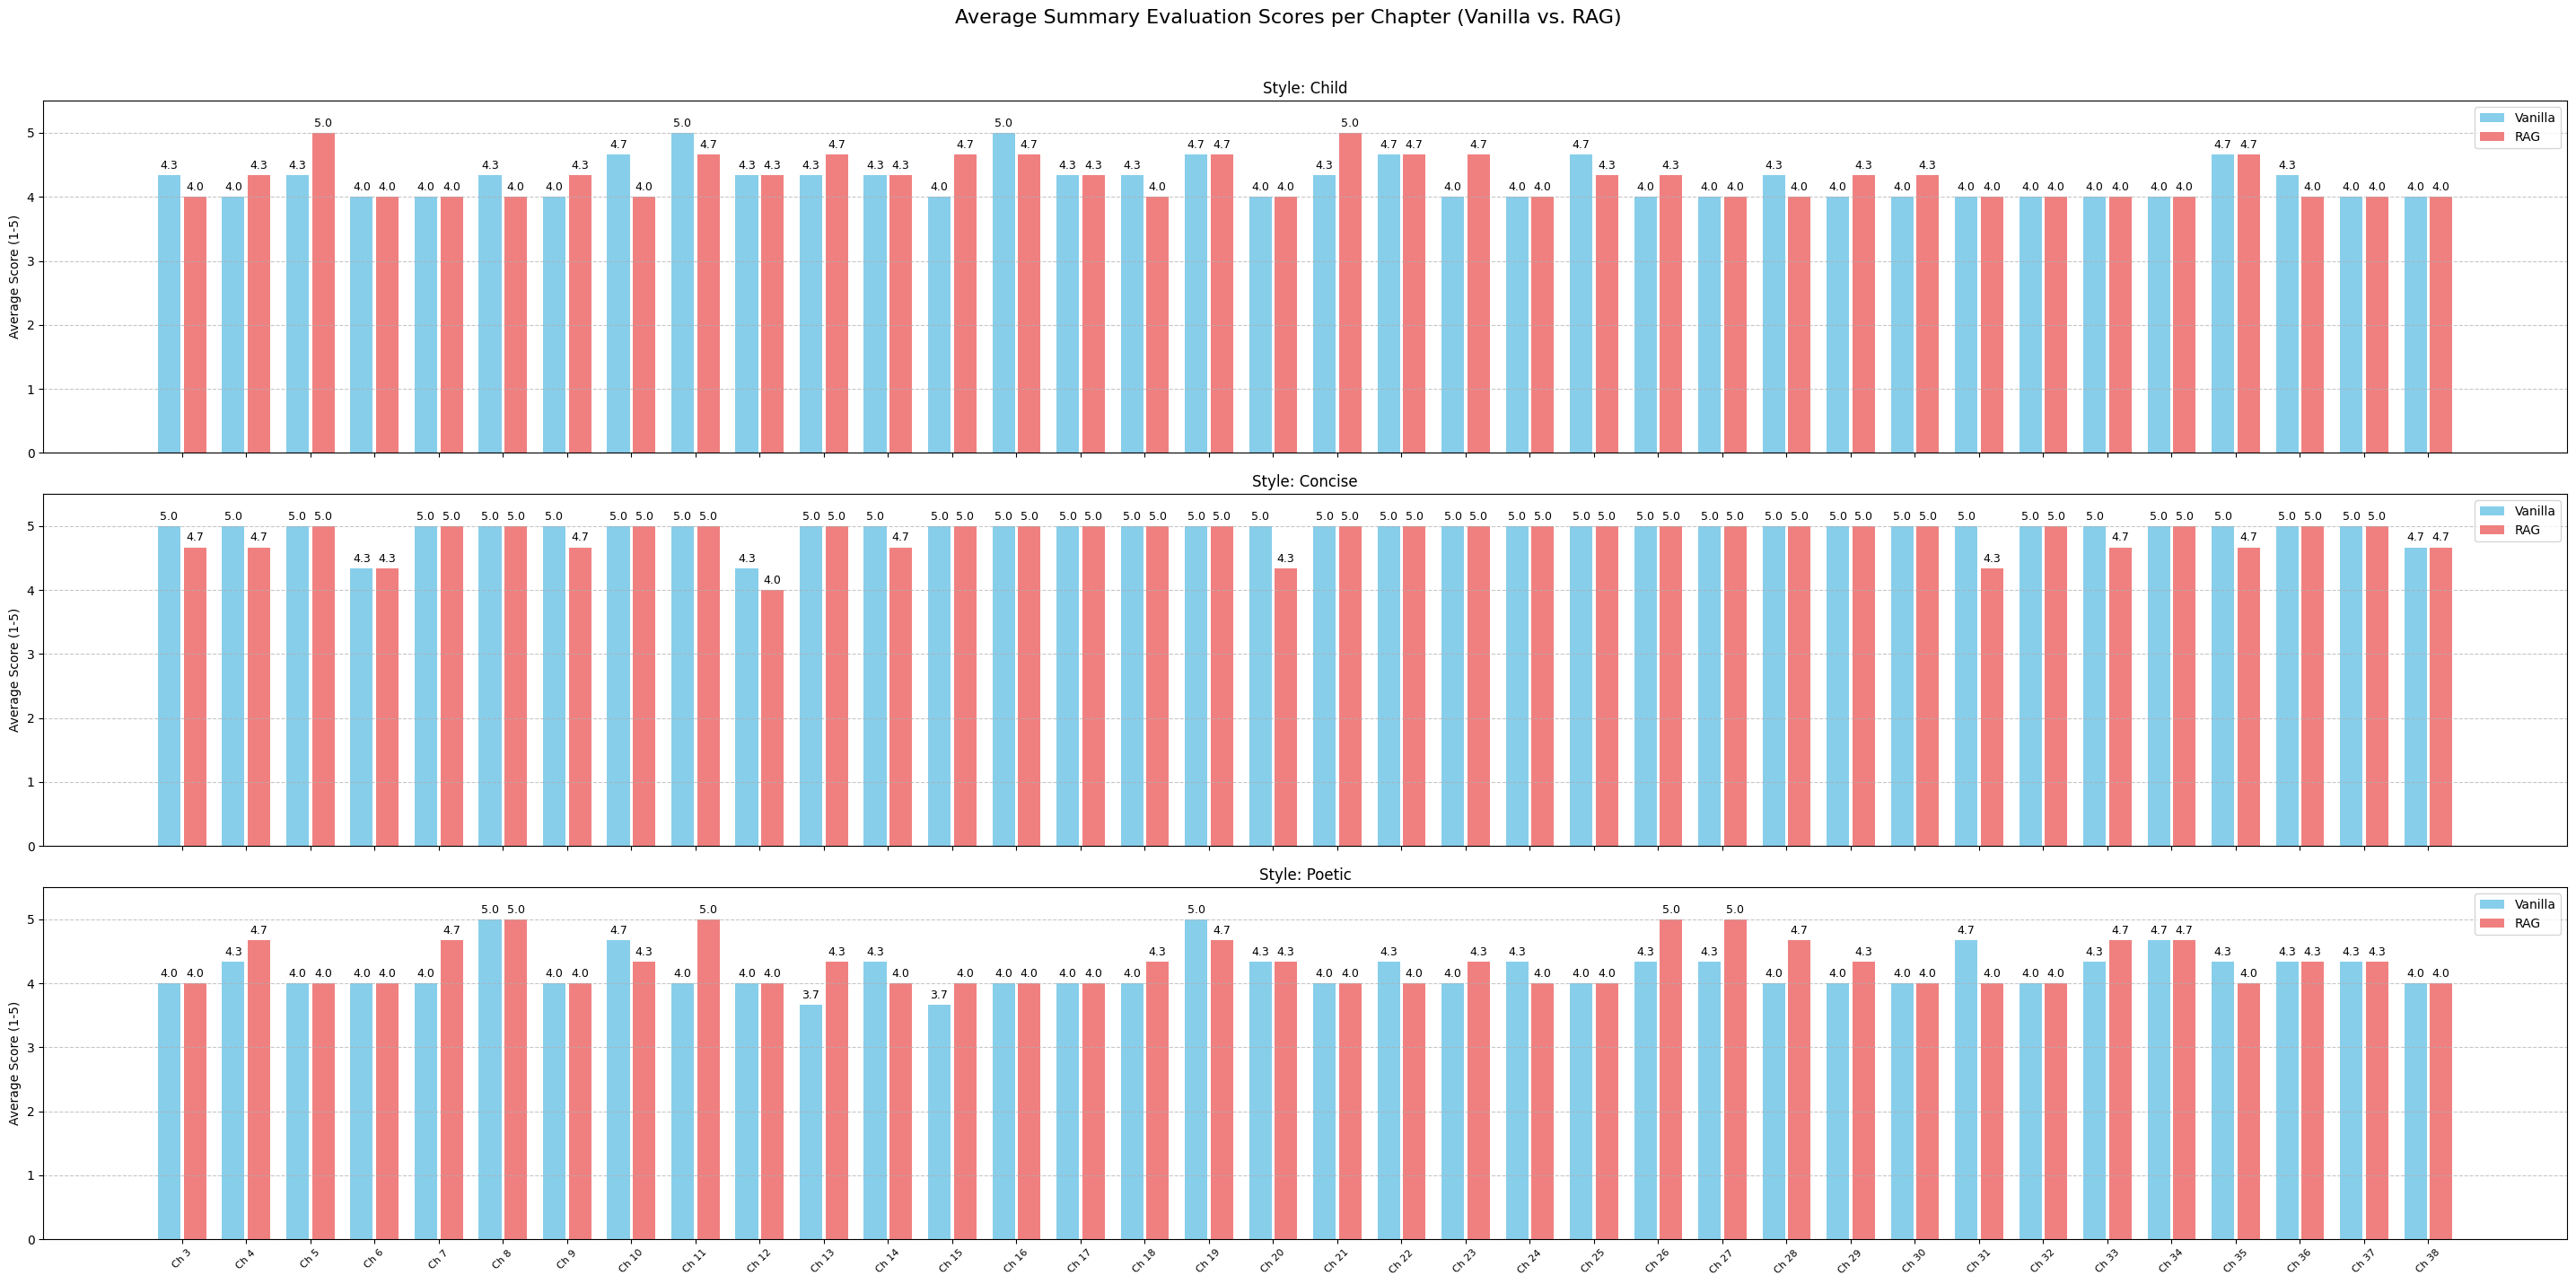


--- Generating Overall Average Score Comparison Plot ---
Overall average scores plot saved to /kaggle/working/results/overall_average_scores.png


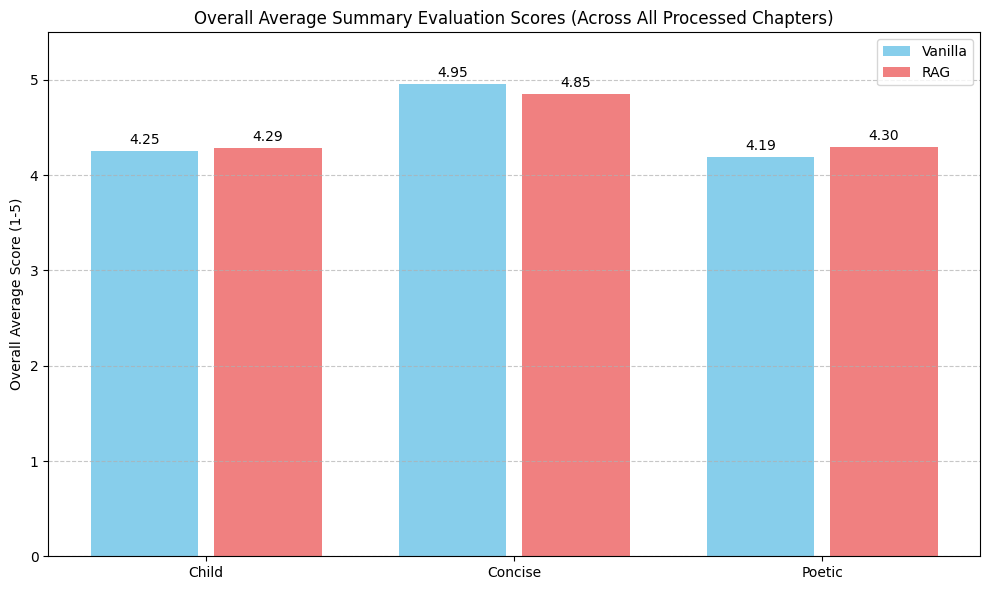


--- Pipeline Finished ---

Successfully processed 36 chapters.


In [1]:
# ==============================================================================
# SECTION 1: INSTALLATIONS & IMPORTS
# ==============================================================================
print("Installing required packages...")
# Ensure clean installation by removing potentially conflicting older versions first.
# Use specific versions for google-genai, ebooklib, etc., to ensure compatibility
# and reproducibility based on the environment this script was developed in.
# Output is suppressed (qqy, > /dev/null) for cleaner logs.
!pip uninstall -qqy google-generativeai google-genai ebooklib > /dev/null 2>&1
!pip install -q "google-genai==1.10.0" "ebooklib==0.18" "beautifulsoup4==4.12.3" "faiss-cpu==1.8.0" "numpy==1.26.4" "tqdm==4.66.4" "matplotlib" > /dev/null 2>&1
print("Packages installed.")

# --- Core Libraries ---
import os                          # Filesystem operations (paths, directories) 
import re                          # Regular expressions (for chapter splitting, score parsing)
import json                        # Handling JSON data (results saving/loading)
import time                        # Time-related functions (e.g., sleep for rate limits)
import traceback                   # Detailed error reporting

# --- Data Handling & Processing ---
import numpy as np                 # Numerical operations (embeddings, scores)
import ebooklib                    # Reading and parsing EPUB files
from ebooklib import epub          # Specific functions from ebooklib (read_epub)
from bs4 import BeautifulSoup      # Parsing HTML content within EPUB items

# --- Vector Search (RAG) ---
import faiss                       # Efficient similarity search for RAG embeddings

# --- Google Generative AI (Gemini) ---
from google import genai           # Main SDK client
from google.genai import types     # Type definitions
from google.api_core import retry  # Decorator for automatic retries on API calls
from google.api_core import exceptions as core_exceptions # Specific API exceptions for retry logic

# --- Utilities & Environment ---
from tqdm.notebook import tqdm     # Progress bars for loops (notebook friendly)
from kaggle_secrets import UserSecretsClient # Securely access API keys in Kaggle environment
import matplotlib.pyplot as plt    # Plotting evaluation results

print("Imports successful.")

# ==============================================================================
# SECTION 2: EPUB READING AND CHAPTER SPLITTING
# ==============================================================================

def extract_text_from_html_item(item):
    """
    Extracts plain text from an EPUB HTML item (typically a chapter file).

    Attempts to preserve paragraph structure by replacing block tags with newlines.
    Handles potential decoding errors gracefully.

    Args:
        item: An ebooklib item object (expected to be ITEM_DOCUMENT).

    Returns:
        A string containing the extracted text, or an empty string on failure.
    """
    try:
        # Decode content, replacing errors to avoid crashes on malformed bytes.
        content = item.get_content().decode('utf-8', errors='replace')
        soup = BeautifulSoup(content, 'html.parser')
        # Extract text, using '\n\n' as separator to mimic paragraph breaks.
        # `strip=True` removes leading/trailing whitespace from the whole text.
        text = soup.get_text('\n\n', strip=True)
        return text if text else ""
    except Exception as e:
        # Log warning but don't stop the whole process for one bad item.
        print(f"Warning: Could not process item {item.get_name()}: {e}")
        return ""

def read_and_split_epub(epub_path, output_dir):
    """
    Reads an EPUB file, concatenates text from its document items,
    splits the text into chapters based on a regex pattern, and saves
    each chapter to a separate text file.

    Args:
        epub_path (str): The file path to the EPUB book.
        output_dir (str): The directory where chapter text files will be saved.

    Returns:
        tuple: (bool, list[str]) where bool indicates success, and the list
               contains the text content of each extracted chapter. Returns
               (False, []) on critical errors (file not found, no text, no chapters).
    """
    print(f"Processing EPUB: {epub_path}")
    if not os.path.exists(epub_path):
        print(f"Error: EPUB file not found at {epub_path}")
        return False, []

    try:
        # Read the EPUB structure using ebooklib.
        book = epub.read_epub(epub_path)
        print("EPUB read successfully.")

        all_text = ""
        # Focus on ITEM_DOCUMENT types, which typically contain the main textual content.
        items = list(book.get_items_of_type(ebooklib.ITEM_DOCUMENT))
        print(f"Found {len(items)} document items.")

        # Iterate through items and aggregate their text content.
        for item in tqdm(items, desc="Extracting text from EPUB items"):
            item_text = extract_text_from_html_item(item)
            # Add double newline between item texts for potential separation.
            all_text += item_text + "\n\n"

        print(f"Extracted {len(all_text)} characters of text.")
        if not all_text.strip():
            # If no text is extracted after processing all items, raise an error.
            print("Error: No text could be extracted from the EPUB.")
            return False, []

        # Define the pattern to identify chapter beginnings.
        # This regex looks for 'CHAPTER' followed by Roman numerals (I, V, X, L, C, D, M)
        # at the start of a line (^\s*), case-insensitive.
        # Adjust this pattern based on the specific EPUB chapter formatting.
        pattern = r'^\s*CHAPTER\s+[IVXLCDM]+\b'
        chapter_headings = re.findall(pattern, all_text, re.MULTILINE | re.IGNORECASE)
        print(f"Found {len(chapter_headings)} potential chapter headings using pattern: '{pattern}'")

        if not chapter_headings:
            # If no headings are found, splitting is impossible with this method.
            print("Error: Could not find any chapter markers using the specified pattern.")
            print("Consider inspecting the EPUB structure or adjusting the regex pattern.")
            return False, []

        print("First 5 detected chapter headings:")
        for i, heading in enumerate(chapter_headings[:5]):
            print(f"  {i+1}: {heading.strip()}")

        # Split the entire text based on the detected chapter headings.
        chapters_content = re.split(pattern, all_text, flags=re.MULTILINE | re.IGNORECASE)

        # The first element of the split result is content *before* the first chapter (e.g., preface).
        preface_content = chapters_content[0].strip()
        if preface_content:
            print(f"\nDetected content before the first chapter (length: {len(preface_content)} chars). This will be ignored.")

        #The remaining elements correspond to the content *after* each heading.
        chapters_content = chapters_content[1:]

        full_chapters_text = []
        # Ensure the number of headings matches the number of content sections found after splitting.
        if len(chapter_headings) == len(chapters_content):
            # Combine each heading with its corresponding content.
            for heading, content in zip(chapter_headings, chapters_content):
                full_chapters_text.append(heading.strip() + "\n\n" + content.strip())
            print(f"\nSuccessfully associated {len(full_chapters_text)} headings with content sections.")
        else:
            # If there's a mismatch, it indicates potential issues with the regex or EPUB structure.
            # As a fallback, use the content sections directly, but they might lack the heading text.
            print(f"\nWarning: Mismatch between detected headings ({len(chapter_headings)}) and split content sections ({len(chapters_content)}).")
            print("Using content sections directly as chapters, which might lack headings.")
            full_chapters_text = [content.strip() for content in chapters_content if content.strip()]

        if not full_chapters_text:
            #If splitting resulted in no valid chapter text.
            print("Error: Splitting resulted in zero valid chapter texts.")
            return False, []

        print(f"Successfully extracted {len(full_chapters_text)} chapters.")

        # Ensure the output directory exists.
        os.makedirs(output_dir, exist_ok=True)
        saved_files = []
        # Save each non-empty chapter to a separate file.
        for i, chapter_text in enumerate(full_chapters_text):
            if chapter_text: #Checking if chapter text is not empty after stripping.
                chapter_path = os.path.join(output_dir, f"chapter_{i+1}.txt")
                try:
                    with open(chapter_path, "w", encoding="utf-8") as f:
                        f.write(chapter_text)
                    saved_files.append(chapter_path)
                except Exception as e:
                    print(f"Error saving chapter {i+1} to {chapter_path}: {e}")
            else:
                # Skip saving if a chapter ended up being empty after processing.
                print(f"Skipping empty chapter {i+1}")

        print(f"\n{len(saved_files)} chapters saved to directory: {output_dir}")
        if len(full_chapters_text) > len(saved_files):
            print(f"Note: {len(full_chapters_text) - len(saved_files)} chapters were empty or failed to save.")

        # Printing a snippet of the first chapter for verification.
        if len(full_chapters_text) >= 1:
            print("\n=== Snippet of Chapter 1 ===")
            snippet = full_chapters_text[0]
            print(snippet[:500] + "..." if len(snippet) > 500 else snippet)

        return True, full_chapters_text

    # Catch specific ebooklib errors for better diagnosis.
    except ebooklib.epub.EpubException as e:
        print(f"Error reading EPUB file (ebooklib specific error): {e}")
        return False, []
    except FileNotFoundError:
        print(f"Error: EPUB file not found at {epub_path}")
        return False, []
    # Catch any other unexpected errors during processing.
    except Exception as e:
        print(f"An unexpected error occurred during EPUB processing: {e}")
        # Print the full traceback for unexpected errors to help debugging.
        traceback.print_exc()
        return False, []

# ==============================================================================
# SECTION 3: CONFIGURATION FOR GEMINI PROCESSING
# ==============================================================================

print("\nConfiguring Gemini settings...")

# --- User Adjustable Parameters ---
# Modify these paths and settings according to your environment and needs.
EPUB_FILE_PATH = '/kaggle/input/example-book/pg75867-images.epub' # Path to the input EPUB file
CHAPTER_OUTPUT_DIR = "/kaggle/working/chapters"           # Directory for saved chapter text files
RESULTS_DIR = "/kaggle/working/results"                 # Directory for JSON results, plots, summaries
EMBEDDING_MODEL = "models/text-embedding-004"             # Google AI model for generating text embeddings (RAG)
GENERATION_MODEL_NAME = "gemini-2.0-flash"     # Google AI model for text generation (e.g., summaries, evaluation)
                                                          # Alternatives: "gemini-1.5-pro-latest", etc.
CHUNK_SIZE = 1000                                         # Target size (in characters) for text chunks in RAG
CHUNK_OVERLAP = 200                                       # Number of characters to overlap between consecutive chunks
RAG_NUM_NEIGHBORS = 3                                     # Number of relevant chunks to retrieve for RAG context

# --- Token/Character Limits ---
# These limits are set lower than model maximums to manage cost, latency, and API rate limits.
# Adjust based on performance, cost constraints, and the complexity of the input book.
MAX_TEXT_INPUT_LEN_CHAPTER = 15000      # Max characters from a chapter fed to the LLM (truncates longer ones)
MAX_COMBINED_SUMMARIES_LEN = 25000      # Max characters of combined chapter summaries used for final book summary
MAX_EVAL_OUTPUT_TOKENS = 50             # Max tokens expected for the evaluation score (keeps it focused)
MAX_POETIC_OUTPUT_TOKENS = 75           # Max tokens for the short, poetic summaries
MAX_OTHER_SUMMARY_TOKENS = 200          # Max tokens for child/concise chapter summaries
MAX_FINAL_SUMMARY_TOKENS = 750          # Max tokens for the synthesized final book summaries
# --- End User Adjustable Parameters ---

# Create output directories if they don't exist to avoid errors during file saving.
os.makedirs(CHAPTER_OUTPUT_DIR, exist_ok=True)
os.makedirs(RESULTS_DIR, exist_ok=True)

print(f"Using Generation Model: {GENERATION_MODEL_NAME}")
print(f"Using Embedding Model: {EMBEDDING_MODEL}")
print(f"Token/Character Limits: Input Chapter Chars={MAX_TEXT_INPUT_LEN_CHAPTER}, Final Summary Tokens={MAX_FINAL_SUMMARY_TOKENS}")

# --- Prompts Definition ---
# Templates for generating summaries in different styles.
# `{context_block}` is a placeholder filled with RAG context (or empty for vanilla).
# `{text}` is a placeholder for the (potentially truncated) chapter text.
PROMPT_TEMPLATES = {
    "child": """\
Explain the key events and characters in this chapter to a 6-year-old child. Use simple words and focus on the main actions and feelings.

{context_block}Chapter Text:
'''{text}'''

Summary for a 6-year-old:""",
    "concise": """\
Provide a brief, objective summary of this chapter in 2-3 clear sentences. Focus only on the most important plot points or information presented.

{context_block}Chapter Text:
'''{text}'''

Concise Summary:""",
    "poetic": """\
Write a short, evocative poem (just 2 to 4 lines) that captures the core mood or central image of this chapter.

{context_block}Chapter Text:
'''{text}'''

Poetic Summary:"""
}

# Header prepended to chapter text when RAG context is provided.
RAG_CONTEXT_HEADER = "Relevant Context from other parts of the Book:\n'''{context}'''\n\n"

# Prompt designed to make the LLM act as an evaluator for generated summaries.
# It includes criteria, a rubric, and placeholders for the original prompt,
# the source text (with context if used), and the generated summary to be evaluated.
SUMMARY_EVALUATION_PROMPT = """\
You are an expert evaluator assessing the quality of an AI-generated text summary based on the original chapter text and the prompt used to create it.

**Evaluation Criteria:**
1.  **Relevance:** Does the summary accurately reflect the main points/events/mood of the chapter text relevant to the *specific* prompt style (child, concise, poetic)?
2.  **Completeness (for Concise/Child):** Does the summary include the most crucial information needed to understand the chapter's essence, within the requested style? (Poetic summaries are judged more on mood/imagery).
3.  **Clarity & Conciseness:** Is the summary easy to understand and appropriately brief for the requested style? (Child should be simple, Concise brief, Poetic evocative).
4.  **Style Adherence:** Does the summary follow the *specific style* requested in the prompt (e.g., simple language for child, objective tone for concise, evocative language for poetic)?

**Rating Rubric (Score 1-5):**
1:  Poor. Irrelevant, inaccurate, fails style completely.
2:  Fair. Some relevance but misses key points or style significantly. Hard to understand.
3:  Average. Addresses the prompt somewhat but lacks depth or strong style adherence. Moderately clear.
4:  Good. Relevant, mostly complete, clear, and generally adheres to the requested style. Minor issues only.
5:  Excellent. Highly relevant, captures essence effectively, very clear, perfectly matches the requested style.

**Evaluation Task:**
Read the original prompt, the chapter text (and any provided context), and the AI-generated response. Based *only* on the criteria above, provide a single integer score from 1 to 5. Do not add any other text, explanation, or punctuation.

**Prompt Used to Generate Response:**
'''{prompt}'''

**Chapter Text (and Context if RAG was used):**
'''{chapter_with_context}'''

**AI-generated Response to Evaluate:**
'''{response}'''

**Your Evaluation Score (1-5):**"""

# --- API Client Setup and Retry Logic ---
client = None
try:
    # Use KaggleSecretsClient to securely fetch the API key stored in the notebook's secrets.
    # The secret name is expected to be "GOOGLE_API_KEY".
    GOOGLE_API_KEY = UserSecretsClient().get_secret("GOOGLE_API_KEY")
    # Initialize the Google Generative AI client with the fetched key.
    client = genai.Client(api_key=GOOGLE_API_KEY)
    print("Google API Key loaded and GenAI client configured.")
except Exception as e:
    # If the API key is missing or invalid, configuration fails. Halt execution.
    print(f"Error configuring Google GenAI Client: {e}")
    # Using SystemExit clearly indicates a fatal configuration error.
    raise SystemExit("API Key configuration failed. Ensure GOOGLE_API_KEY is set in Kaggle Secrets.")

def is_retryable_error(exc):
    """
    Predicate function for google.api_core.retry.
    Determines if an encountered API exception warrants a retry attempt.
    Targets transient errors like rate limits, server issues, or timeouts.
    """
    return isinstance(exc, (
        core_exceptions.ResourceExhausted, # e.g., 429 Quota exceeded
        core_exceptions.ServiceUnavailable,# e.g., 503 Service temporarily unavailable
        core_exceptions.DeadlineExceeded,  # Request took too long
        core_exceptions.InternalServerError # e.g., 500 Internal server error
    ))

# Apply the @retry.Retry decorator to wrap the generate_content API call.
# This automatically handles retries based on the `is_retryable_error` predicate.
# Uses exponential backoff starting with 4s delay, max 120s, multiplier 2.0.
# Increased initial delay helps manage stricter rate limits (e.g., 15 RPM requires ~4s between requests).
@retry.Retry(predicate=is_retryable_error, initial=4.0, maximum=120.0, multiplier=2.0)
def generate_content_with_retry(*args, **kwargs):
    """Wraps the Gemini `generate_content` call with automatic retries for transient errors."""
    if not client:
        raise SystemExit("GenAI Client not initialized before API call.")
    #Explicit sleep *before* each attempt to proactively manage rate limits.
    #Adjust based on the specific model's limits (e.g., 15 RPM -> 60s/15 = 4s).
    time.sleep(4)
    return client.models.generate_content(*args, **kwargs)

# Apply retry logic similarly to the embedding API call.
# Uses a shorter initial delay as embedding models often have higher rate limits.
@retry.Retry(predicate=is_retryable_error, initial=1.0, maximum=60.0, multiplier=2.0)
def embed_content_with_retry(*args, **kwargs):
    """Wraps the Gemini `embed_content` call with automatic retries for transient errors."""
    if not client:
        raise SystemExit("GenAI Client not initialized before API call.")
    # Shorter sleep for embedding calls, adjust if rate limit errors persist.
    time.sleep(1)
    return client.models.embed_content(*args, **kwargs)

print("Configuration complete.")

# ==============================================================================
# SECTION 4: CORE PROCESSING CLASS (ChapterProcessor)
# ==============================================================================

class ChapterProcessor:
    """
    Encapsulates the logic for processing book chapters, including:
    - Chunking text for Retrieval-Augmented Generation (RAG).
    - Building a FAISS vector index for efficient context retrieval.
    - Generating chapter summaries using both 'vanilla' LLM calls and RAG.
    - Evaluating the generated summaries using the LLM itself.
    """

    def __init__(self, embedding_model_name, generation_model_name):
        """
        Initializes the processor with the specified model names.

        Args:
            embedding_model_name (str): The name of the embedding model to use.
            generation_model_name (str): The name of the generation model to use.
        """
        self.embedding_model = embedding_model_name
        self.generation_model = generation_model_name
        self.vector_store = None # FAISS index, initialized in build_rag_index
        self.chunks_data = []    # List to store chunk metadata (text, chapter, position)
        print("ChapterProcessor initialized.")

    def _chunk_text(self, text, chapter_index):
        """
        Splits a given text into overlapping chunks of a defined size.

        Args:
            text (str): The text to be chunked.
            chapter_index (int): The 1-based index of the chapter this text belongs to.

        Returns:
            list[dict]: A list of dictionaries, each representing a chunk with its
                        text, chapter index, and character start/end positions.
        """
        chunks = []
        start = 0
        text_len = len(text)
        while start < text_len:
            end = start + CHUNK_SIZE
            chunk_text = text[start:end]
            # Only add non-empty chunks.
            if chunk_text.strip():
                chunks.append({
                    "text": chunk_text,
                    "chapter": chapter_index,
                    "start_char": start,
                    "end_char": min(end, text_len) # Ensure end doesn't exceed text length
                })

            # Move the start position for the next chunk.
            next_start = start + CHUNK_SIZE - CHUNK_OVERLAP

            # --- Logic Adjustment Explanation ---
            # If the next calculated start position doesn't advance beyond the current start
            # (can happen if overlap >= chunk_size, or edge cases),
            # force advancement by at least one character past the *previous* chunk's overlap start point
            # to prevent infinite loops. More robustly: ensure next start is after current start.
            # A simpler check: if next_start <= start, increment start by 1.
            # However, the original logic `if start <= (end - CHUNK_OVERLAP): start = end - CHUNK_OVERLAP + 1`
            # seems intended to handle cases where the calculated `next_start` might not advance
            # sufficiently if `end` hit the `text_len` boundary exactly right.
            # Let's simplify for clarity: always advance by stride, unless near the end.
            start = next_start
            if start >= text_len: # Exit if we've covered the entire text.
                break
            # Safety break: if start somehow doesn't advance, exit loop. This shouldn't happen with correct stride.
            # if start == previous_start: break # Add if suspecting infinite loops

        return chunks

    def build_rag_index(self, chapters_text_list):
        """
        Chunks all provided chapter texts, generates embeddings for each chunk,
        and builds a FAISS index for fast vector similarity search.

        Args:
            chapters_text_list (list[str]): A list containing the full text of each chapter.

        Returns:
            bool: True if the index was built successfully, False otherwise.
        """
        print("\nBuilding RAG index...")
        all_chunks = []
        # Chunk each chapter and store metadata.
        for i, chapter_text in enumerate(tqdm(chapters_text_list, desc="Chunking chapters")):
            # Use 1-based index for chapter number in metadata.
            all_chunks.extend(self._chunk_text(chapter_text, chapter_index=i+1))

        if not all_chunks:
            print("Warning: No chunks were created from the text. RAG index cannot be built.")
            self.chunks_data = []
            self.vector_store = None
            return False

        self.chunks_data = all_chunks
        print(f"Created {len(self.chunks_data)} chunks.")

        embeddings = []
        batch_size = 100 # Process embeddings in batches to avoid overwhelming the API.
        embedding_dimension = -1 # Will be determined from the first successful batch.

        # Generate embeddings for all chunks in batches.
        for i in tqdm(range(0, len(self.chunks_data), batch_size), desc="Embedding chunks"):
            batch_texts = [chunk["text"] for chunk in self.chunks_data[i:i+batch_size]]
            try:
                # Use the retry wrapper for the embedding call.
                # Specify task_type for potential model optimization.
                response = embed_content_with_retry(
                    model=self.embedding_model,
                    contents=batch_texts,
                    config=types.EmbedContentConfig(task_type="RETRIEVAL_DOCUMENT")
                )
                # Check if the response structure is as expected.
                if hasattr(response, 'embeddings') and isinstance(response.embeddings, list):
                    batch_embeddings = [e.values for e in response.embeddings]
                    if batch_embeddings:
                        # Determine dimension from the first valid embedding in the first batch.
                        if embedding_dimension == -1:
                            embedding_dimension = len(batch_embeddings[0])
                        
                        # Sanity check: ensure all embeddings in the batch have the correct dimension.
                        if all(len(e) == embedding_dimension for e in batch_embeddings):
                            embeddings.extend(batch_embeddings)
                        else:
                            # Handle unexpected dimension mismatch within a batch.
                            print(f"Error: Inconsistent embedding dimensions in batch {i // batch_size}.")
                            # Add placeholder zero vectors to maintain list length alignment.
                            fallback_dim = embedding_dimension if embedding_dimension != -1 else 768 # Default fallback
                            embeddings.extend([[0.0] * fallback_dim] * len(batch_texts))
                    else:
                        # Handle cases where the API returns an empty embeddings list for a batch.
                        print(f"Warning: Empty embedding list returned for batch {i // batch_size}.")
                        fallback_dim = embedding_dimension if embedding_dimension != -1 else 768
                        embeddings.extend([[0.0] * fallback_dim] * len(batch_texts))
                else:
                    # Handle unexpected API response structure.
                    print(f"Warning: Unexpected embedding response structure at batch {i // batch_size}.")
                    fallback_dim = embedding_dimension if embedding_dimension != -1 else 768
                    embeddings.extend([[0.0] * fallback_dim] * len(batch_texts))
            except Exception as e:
                # Handle errors during the embedding API call for a batch.
                print(f"Error embedding batch {i // batch_size}: {e}")
                fallback_dim = embedding_dimension if embedding_dimension != -1 else 768
                embeddings.extend([[0.0] * fallback_dim] * len(batch_texts)) # Add placeholders

        # Final validation before creating the index.
        if not embeddings or len(embeddings) != len(self.chunks_data):
            print(f"Error: Embedding count mismatch ({len(embeddings)} found vs {len(self.chunks_data)} chunks expected). Cannot build index.")
            self.vector_store = None
            return False
        if embedding_dimension == -1:
             print("Error: Could not determine embedding dimension after processing all batches.")
             self.vector_store = None
             return False

        try:
            # Convert the list of embeddings to a NumPy array of type float32 for FAISS.
            embeddings_np = np.array(embeddings).astype('float32')

            # Verify the final shape of the embedding array.
            if embeddings_np.ndim != 2 or embeddings_np.shape[0] != len(self.chunks_data) or embeddings_np.shape[1] != embedding_dimension:
                print(f"Error: Final embeddings array shape is incorrect: {embeddings_np.shape}. Expected ({len(self.chunks_data)}, {embedding_dimension}).")
                self.vector_store = None
                return False

            print(f"Generated {embeddings_np.shape[0]} embeddings with dimension {embedding_dimension}.")

            # Create a FAISS index using IndexFlatL2 (exact Euclidean distance search).
            # Suitable for moderate numbers of vectors where exact search is feasible.
            self.vector_store = faiss.IndexFlatL2(embedding_dimension)
            # Add the embeddings to the index.
            self.vector_store.add(embeddings_np)
            print(f"FAISS index built successfully. Total vectors indexed: {self.vector_store.ntotal}")
            return True
        except Exception as faiss_e:
            #Handle errors during FAISS index creation or adding vectors.
            print(f"Error creating or populating FAISS index: {faiss_e}")
            self.vector_store = None
            return False

    def _get_rag_context(self, query_text, num_neighbors):
        """
        Embeds a query text and retrieves the text of the 'num_neighbors' most
        similar chunks from the FAISS vector store.

        Args:
            query_text (str): The text to use as the basis for the similarity search.
            num_neighbors (int): The number of top matching chunks to retrieve.

        Returns:
            str: A string containing the concatenated text of the retrieved chunks,
                 separated by '---', or an empty string if retrieval fails or the
                 index is unavailable.
        """
        # Check if the RAG index is ready.
        if not self.vector_store or self.vector_store.ntotal == 0:
            print("Warning: RAG vector store is not available or is empty. Cannot retrieve context.")
            return ""
        try:
            # Embed the query text using the appropriate task type.
            response = embed_content_with_retry(
                model=self.embedding_model,
                contents=[query_text],
                # Use RETRIEVAL_QUERY type for embedding the search query.
                config=types.EmbedContentConfig(task_type="RETRIEVAL_QUERY")
            )

            # Extract the embedding vector from the response.
            # Handle potential variations in the response structure gracefully.
            query_embedding_list = None
            if hasattr(response, 'embedding') and hasattr(response.embedding, 'values'):
                query_embedding_list = response.embedding.values
            # Some API versions might return a list even for single content.
            elif hasattr(response, 'embeddings') and isinstance(response.embeddings, list) and len(response.embeddings) > 0 and hasattr(response.embeddings[0], 'values'):
                query_embedding_list = response.embeddings[0].values
            else:
                # If structure is unexpected, raise an error.
                raise ValueError("Unexpected response structure for query embedding.")

            if query_embedding_list is None or not isinstance(query_embedding_list, list):
                raise ValueError("Could not extract a valid list of values for the query embedding.")

            # Convert the query embedding to a NumPy array (float32) for FAISS search.
            query_embedding = np.array([query_embedding_list]).astype('float32')

            # Perform the similarity search on the FAISS index.
            # `search` returns distances and indices of the k nearest neighbors.
            distances, indices = self.vector_store.search(query_embedding, num_neighbors)

            # Retrieve the original text of the found chunks using the indices.
            # Includes boundary check for safety.
            context_texts = [
                self.chunks_data[i]["text"]
                for i in indices[0] # indices[0] because we searched for a single query vector
                if 0 <= i < len(self.chunks_data) # Ensure index is valid
            ]

            # Join the retrieved chunk texts with a clear separator.
            return "\n\n---\n\n".join(context_texts)

        except Exception as e:
            # Log errors during the retrieval process.
            print(f"Error during RAG context retrieval: {e}")
            return "" # Return empty string on failure

    def evaluate_summary(self, original_prompt, chapter_with_context, generated_summary):
        """
        Uses the configured generation LLM to evaluate a generated summary based
        on the provided prompt, source text, and evaluation criteria.

        Args:
            original_prompt (str): The prompt used to generate the summary.
            chapter_with_context (str): The original chapter text, potentially including RAG context.
            generated_summary (str): The AI-generated summary text to be evaluated.

        Returns:
            int: An integer score from 1 to 5, or 0 if evaluation fails, the summary
                 is clearly an error message, or the score cannot be parsed.
        """
        # Skip evaluation if the summary itself indicates an error or is empty.
        if not generated_summary or generated_summary.lower().strip().startswith("error:"):
            return 0

        # Format the evaluation prompt with the specific details of this summary.
        eval_prompt = SUMMARY_EVALUATION_PROMPT.format(
            prompt=original_prompt,
            chapter_with_context=chapter_with_context,
            response=generated_summary
        )

        try:
            # Call the generation model with the evaluation prompt.
            # Use temperature 0.0 for deterministic evaluation scoring.
            # Limit output tokens to prevent lengthy explanations.
            eval_response = generate_content_with_retry(
                model=self.generation_model,
                contents=[eval_prompt],
                config=types.GenerateContentConfig(
                    temperature=0.0,
                    max_output_tokens=MAX_EVAL_OUTPUT_TOKENS
                )
            )

            # Parse the score from the LLM's response text.
            if eval_response and hasattr(eval_response, 'text'):
                response_text = eval_response.text.strip()
                # Try to find a single digit 1-5 surrounded by word boundaries (more robust).
                match = re.search(r'\b([1-5])\b', response_text)
                if match:
                    return int(match.group(1))
                # As a fallback, check if the entire response is just a single digit 1-5.
                match_strict = re.match(r'^[1-5]$', response_text)
                if match_strict:
                    return int(response_text)

                # If score cannot be parsed, log a warning and return 0.
                print(f"Warning: Couldn't extract score (1-5) from evaluation response: '{response_text}'")
                return 0
            else:
                # Handle cases where the response is empty or blocked.
                feedback = getattr(eval_response, 'prompt_feedback', None)
                reason = getattr(feedback, 'block_reason', 'Unknown') if feedback else 'No response'
                print(f"Warning: Evaluation response was empty or malformed. Reason: {reason}")
                return 0
        except Exception as e:
            # Handle errors during the evaluation API call.
            print(f"Error during summary evaluation API call: {e}")
            return 0 # Return 0 on API failure

    def process_chapter(self, chapter_text, method):
        """
        Generates and evaluates summaries for a single chapter using a specified method
        ('vanilla' or 'rag') across all defined styles ('child', 'concise', 'poetic').

        Args:
            chapter_text (str): The full text of the chapter.
            method (str): The summarization method to use ('vanilla' or 'rag').

        Returns:
            dict: A dictionary where keys are style names ('child', 'concise', 'poetic')
                  and values are dictionaries containing lists of raw scores/summaries,
                  the best score, best summary, and average score for that style.
        """
        results_by_style = {}
        MAX_RETRIES = 3 # Number of generation/evaluation attempts per style

        # Truncate chapter text if it exceeds the configured maximum length.
        if len(chapter_text) > MAX_TEXT_INPUT_LEN_CHAPTER:
            print(f"  Warning: Chapter text truncated from {len(chapter_text)} to {MAX_TEXT_INPUT_LEN_CHAPTER} chars.")
            truncated_chapter_text = chapter_text[:MAX_TEXT_INPUT_LEN_CHAPTER]
        else:
            truncated_chapter_text = chapter_text

        context_block = "" # Placeholder for RAG context header+text
        # The text used for evaluation should include RAG context if it was used.
        chapter_with_context_for_eval = truncated_chapter_text

        # If RAG method is requested, retrieve context.
        if method == "rag":
            print(f"    Retrieving RAG context...")
            context = self._get_rag_context(truncated_chapter_text, RAG_NUM_NEIGHBORS)
            if context:
                # Format the context block to be prepended to the prompt.
                context_block = RAG_CONTEXT_HEADER.format(context=context)
                # Update the text used for evaluation to include this context.
                chapter_with_context_for_eval = context_block + "Chapter Text:\n'''" + truncated_chapter_text + "'''"
                print(f"    RAG context retrieved ({len(context)} chars).")
            else:
                # If RAG retrieval fails, log a warning and fall back to the vanilla method.
                print(f"    Warning: Failed to retrieve RAG context. Falling back to Vanilla method for this chapter.")
                method = "vanilla" # Ensure subsequent processing uses vanilla

        # Process each defined style.
        for style, template in PROMPT_TEMPLATES.items():
            print(f"    Processing style: {style.capitalize()}...")
            scores, summaries = [], []
            prompt_for_eval = "" # Store the first prompt used for evaluation consistency

            # Attempt generation and evaluation multiple times for robustness.
            for attempt in range(MAX_RETRIES):
                # Format the final prompt using the template, context (if any), and chapter text.
                full_prompt = template.format(context_block=context_block, text=truncated_chapter_text)
                # Use the prompt from the first attempt for all evaluations of this style.
                if attempt == 0:
                    prompt_for_eval = full_prompt

                try:
                    # Use higher temperature for more creative styles like 'poetic'.
                    temp = 0.8 if style == "poetic" else 0.3
                    # Set appropriate max output tokens based on the style.
                    max_tokens = MAX_POETIC_OUTPUT_TOKENS if style == "poetic" else MAX_OTHER_SUMMARY_TOKENS

                    # Generate the summary using the retry wrapper.
                    response = generate_content_with_retry(
                        model=self.generation_model,
                        contents=[full_prompt],
                        config=types.GenerateContentConfig(
                            temperature=temp, max_output_tokens=max_tokens
                        )
                    )

                    # Extract summary text or handle errors/blocks.
                    summary = "Error: No response text received from API."
                    if response and hasattr(response, 'text'):
                        summary = response.text.strip()
                    # Check for content blocking feedback.
                    elif response and hasattr(response, 'prompt_feedback') and response.prompt_feedback.block_reason:
                        reason = response.prompt_feedback.block_reason
                        print(f"      Warning: Generation blocked (Style: {style}, Method: {method}, Attempt: {attempt+1}). Reason: {reason}")
                        summary = f"Error: Content blocked by API ({reason})"
                    elif response is None:
                         print(f"      Warning: API returned a null response (Style: {style}, Method: {method}, Attempt: {attempt+1}).")
                         summary = "Error: Null response received from API."
                    else:
                         # Catch other unexpected response types.
                         print(f"      Warning: Empty or unexpected response object (Style: {style}, Method: {method}, Attempt: {attempt+1}). Type: {type(response)}")
                         summary = "Error: Empty or unexpected response from API."

                    # Evaluate the generated summary (even if it's an error message, eval handles it).
                    score = self.evaluate_summary(prompt_for_eval, chapter_with_context_for_eval, summary)
                    scores.append(score)
                    summaries.append(summary)

                    # Optional: Could break early if a satisfactory score is achieved.
                    # if score >= 4: break

                except Exception as e:
                    # Handle exceptions during the generation/evaluation attempt.
                    print(f"      Error during processing (Style: {style}, Method: {method}, Attempt: {attempt+1}): {e}")
                    # Avoid spamming tracebacks for common transient errors like rate limits.
                    if not isinstance(e, core_exceptions.ResourceExhausted):
                        traceback.print_exc()
                    # Record failure for this attempt.
                    scores.append(0)
                    summaries.append(f"Error during generation attempt {attempt+1}: {type(e).__name__}")
                    # No explicit sleep needed here; the @retry wrapper handles backoff.

            # Determine the best result from the attempts for this style.
            best_score, best_summary, avg_score = 0, "Error: No valid summaries generated.", 0.0
            if scores: # Check if any attempts were made
                # Filter out attempts that resulted in error messages.
                valid_attempts = [(s, summ) for s, summ in zip(scores, summaries) if not summ.lower().startswith("error:")]
                if valid_attempts:
                    # Find the attempt with the highest score among valid ones.
                    best_score, best_summary = max(valid_attempts, key=lambda item: item[0])
                    # Calculate average score, considering only positive scores from valid attempts.
                    positive_scores = [s for s, summ in valid_attempts if s > 0]
                    if positive_scores:
                        avg_score = np.mean(positive_scores)
                    # If no valid attempts had positive scores, avg_score remains 0.0
                else:
                    # If all attempts resulted in errors, report the first error encountered.
                    best_summary = summaries[0] if summaries else "Error: All attempts failed or yielded errors."
            else: # Should not happen if MAX_RETRIES > 0, just a safeguard.
                best_summary = "Error: No generation attempts were recorded."

            print(f"      Best Result (Style: {style}): Score={best_score}, Avg Score={avg_score:.2f}")
            # Store all results for this style.
            results_by_style[style] = {
                "raw_scores": scores,
                "raw_summaries": summaries,
                "average_score": avg_score,
                "best_score": best_score,
                "best_summary": best_summary
            }
        return results_by_style




 


# ==============================================================================
# SECTION 5: VISUALIZATION & OUTPUT FUNCTIONS
# ==============================================================================

def plot_evaluation_scores(results):
    """
    Generates and saves a bar chart comparing the average evaluation scores
    for 'vanilla' vs 'RAG' methods across different summary styles for EACH
    processed chapter. Attempts to mitigate label overlap.
    """
    print("\n--- Generating Per-Chapter Evaluation Score Comparison Plot ---")
    if not results:
        print("No results data provided for plotting.")
        return
    try:
        # Filtering results to ensure they have the expected 'chapter' key.
        valid_results = [r for r in results if 'chapter' in r]
        if not valid_results:
            print("No valid chapter data found in results for plotting.")
            return

        # Extract chapter numbers and define styles/methods for plotting.
        chapters = [r['chapter'] for r in valid_results]
        styles = list(PROMPT_TEMPLATES.keys()) # ['child', 'concise', 'poetic']
        methods = ['vanilla', 'rag']

        # Structure data for easy plotting: {method: {style: [scores_for_each_chapter]}}
        avg_scores = {method: {style: [] for style in styles} for method in methods}
        for r in valid_results:
            for method in methods:
                for style in styles:
                    # Safely get the average score, defaulting to 0 if method/style is missing.
                    # Use the calculated 'average_score' which already handles potential 0 scores from failed attempts.
                    score = r.get(method, {}).get(style, {}).get('average_score', 0.0)
                    avg_scores[method][style].append(score)

        num_chapters = len(chapters)
        if num_chapters == 0:
            print("Zero chapters found with valid score data for plotting.")
            return

        # --- Plotting Setup ---
        x = np.arange(num_chapters) # the label locations for chapters
        num_styles = len(styles)

        # --- Adjustments for Clarity ---
        # Reduce bar width and add a small gap within the group
        width = 0.35
        group_gap = 0.05
        # Adjust figure width based on the number of chapters to give more space
        fig_width = max(12, num_chapters * 0.8) # Ensure minimum width, increase per chapter

        fig, axs = plt.subplots(num_styles, 1, figsize=(fig_width, 5 * num_styles), sharex=True, squeeze=False)
        fig.suptitle('Average Summary Evaluation Scores per Chapter (Vanilla vs. RAG)', fontsize=16)

        # --- Generate Bars for Each Style ---
        for i, style in enumerate(styles):
            ax = axs[i, 0] # Get the subplot for the current style.

            # Calculate precise positions for grouped bars
            vanilla_pos = x - width/2 - group_gap/2
            rag_pos = x + width/2 + group_gap/2

            # Plot Vanilla scores.
            vanilla_data = avg_scores['vanilla'][style]
            rects1 = ax.bar(vanilla_pos, vanilla_data, width, label='Vanilla', color='skyblue')

            # Plot RAG scores.
            rag_data = avg_scores['rag'][style]
            # Check if RAG was actually attempted for this style in any chapter
            rag_attempted = any('rag' in r and style in r.get('rag', {}) for r in valid_results)
            if rag_attempted: # Plot RAG bars if it was attempted, even if scores are 0.
                 rects2 = ax.bar(rag_pos, rag_data, width, label='RAG', color='lightcoral')
                 # Add labels to RAG bars with smaller font size
                 ax.bar_label(rects2, padding=3, fmt='%.1f', fontsize=9)

            # Add labels to Vanilla bars with smaller font size
            ax.bar_label(rects1, padding=3, fmt='%.1f', fontsize=9)

            # --- Axes Formatting ---
            ax.set_ylabel('Average Score (1-5)')
            ax.set_title(f'Style: {style.capitalize()}')
            ax.set_xticks(x) # Set chapter tick positions (centered between the group)
            ax.set_xticklabels([f'Ch {c}' for c in chapters]) # Label ticks with chapter numbers.
            # Rotate x-labels if many chapters, reduce font size
            if num_chapters > 15:
                ax.tick_params(axis='x', rotation=45, labelsize=8)
            else:
                ax.tick_params(axis='x', labelsize=9)

            ax.legend() # Show the legend (Vanilla, RAG).
            ax.grid(axis='y', linestyle='--', alpha=0.7) # Add horizontal grid lines.
            ax.set_ylim(0, 5.5) # Set y-axis limit slightly above max score (5).

        # Adjust layout to prevent overlap and save the figure.
        fig.tight_layout(rect=[0, 0.03, 1, 0.96]) # Adjust rect slightly for title space
        plot_path = os.path.join(RESULTS_DIR, "evaluation_scores_comparison_per_chapter.png") # Renamed file
        plt.savefig(plot_path)
        print(f"Per-chapter evaluation scores plot saved to {plot_path}")
        plt.show() # Display the plot in the notebook output.

    except Exception as e:
        # Catch errors during plot generation.
        print(f"Error generating the per-chapter evaluation scores plot: {e}")
        traceback.print_exc()


def plot_overall_average_scores(results):
    """
    Generates and saves a bar chart showing the OVERALL average evaluation scores
    (averaged across all processed chapters) for each method and style.
    """
    print("\n--- Generating Overall Average Score Comparison Plot ---")
    if not results:
        print("No results data provided for plotting overall averages.")
        return
    try:
        valid_results = [r for r in results if 'chapter' in r]
        if not valid_results:
            print("No valid chapter data found for calculating overall averages.")
            return

        styles = list(PROMPT_TEMPLATES.keys())
        methods = ['vanilla', 'rag']

        # Calculate overall average scores: {method: {style: overall_avg}}
        overall_avg_scores = {method: {} for method in methods}

        for method in methods:
            for style in styles:
                # Collect all average scores for this method/style across all chapters
                style_scores = [
                    r.get(method, {}).get(style, {}).get('average_score', 0.0)
                    for r in valid_results if method in r and style in r[method]
                ]
                # Calculate the mean, handling the case where no scores exist (results in 0.0)
                if style_scores:
                    overall_avg_scores[method][style] = np.mean(style_scores)
                else:
                    overall_avg_scores[method][style] = 0.0 # Default to 0 if no scores found

        # --- Plotting Setup ---
        x = np.arange(len(styles)) # the label locations for styles
        width = 0.35  # the width of the bars
        group_gap = 0.05 # Gap between bars within a style group

        fig, ax = plt.subplots(figsize=(10, 6)) # Single plot

        # Calculate precise positions for grouped bars (Vanilla, RAG) per style
        vanilla_pos = x - width/2 - group_gap/2
        rag_pos = x + width/2 + group_gap/2

        # Extract overall average scores for plotting
        vanilla_means = [overall_avg_scores['vanilla'].get(style, 0.0) for style in styles]
        rag_means = [overall_avg_scores['rag'].get(style, 0.0) for style in styles]

        # Create the bars
        rects1 = ax.bar(vanilla_pos, vanilla_means, width, label='Vanilla', color='skyblue')
        rects2 = ax.bar(rag_pos, rag_means, width, label='RAG', color='lightcoral')

        # Add labels on top of the bars
        ax.bar_label(rects1, padding=3, fmt='%.2f') # Show two decimal places for average
        ax.bar_label(rects2, padding=3, fmt='%.2f')

        # --- Axes Formatting ---
        ax.set_ylabel('Overall Average Score (1-5)')
        ax.set_title('Overall Average Summary Evaluation Scores (Across All Processed Chapters)')
        ax.set_xticks(x) # Set style tick positions (centered between the group)
        ax.set_xticklabels([s.capitalize() for s in styles]) # Label ticks with style names
        ax.legend()
        ax.grid(axis='y', linestyle='--', alpha=0.7)
        ax.set_ylim(0, 5.5) # Set y-axis limit

        # Adjust layout and save
        fig.tight_layout()
        plot_path = os.path.join(RESULTS_DIR, "overall_average_scores.png")
        plt.savefig(plot_path)
        print(f"Overall average scores plot saved to {plot_path}")
        plt.show()

    except Exception as e:
        print(f"Error generating the overall average scores plot: {e}")
        traceback.print_exc()

# Custom serializer function needed for json.dump when data contains NumPy types.
def default_serializer(obj):
    """Converts NumPy types to standard Python types for JSON serialization."""
    if isinstance(obj, np.integer): return int(obj)      # Convert numpy int to python int
    if isinstance(obj, np.floating): return float(obj)   # Convert numpy float to python float
    if isinstance(obj, np.ndarray): return obj.tolist()  # Convert numpy array to python list
    # If object type is not handled above, raise TypeError.
    raise TypeError(f"Object of type {obj.__class__.__name__} is not JSON serializable")

def save_and_print_results(results, generation_model_name):
    """Saves detailed results and generates three final book summaries based on mixed chapter styles."""
    # --- (Keep the existing code for saving results and generating final summaries here) ---
    # --- Save Full Raw Results ---
    full_results_path = os.path.join(RESULTS_DIR, "full_chapter_results.json")
    try:
        save_data = {
            "generation_model": generation_model_name, "embedding_model": EMBEDDING_MODEL,
            "config": {
                "chunk_size": CHUNK_SIZE, "chunk_overlap": CHUNK_OVERLAP,
                "rag_neighbors": RAG_NUM_NEIGHBORS, "max_input_chars": MAX_TEXT_INPUT_LEN_CHAPTER,
                "max_final_summary_tokens": MAX_FINAL_SUMMARY_TOKENS
                },
            "chapter_results": results
        }
        with open(full_results_path, "w", encoding="utf-8") as f:
            json.dump(save_data, f, indent=2, default=default_serializer)
        print(f"\nFull detailed results saved to {full_results_path}")
    except Exception as e:
        print(f"Error saving full results JSON: {e}")

    # --- Collect Best of Each Style per Chapter ---
    print("\nCollecting best summaries (child, concise, poetic) for each chapter...")
    all_chapters_best_summaries = [] # List of dicts, one per chapter
    styles_to_collect = ["child", "concise", "poetic"]

    for chapter_result in results:
        chapter_num = chapter_result.get("chapter", "Unknown")
        chapter_bests = {"chapter": chapter_num}

        for style in styles_to_collect:
            best_score_for_style = -1
            best_summary_for_style = None
            method_used = "N/A"

            for method in ['vanilla', 'rag']:
                if method in chapter_result and style in chapter_result[method]:
                    eval_data = chapter_result[method][style]
                    score = eval_data.get("best_score", 0)
                    summary = eval_data.get("best_summary", "")
                    if score > best_score_for_style and summary and not summary.lower().startswith("error:"):
                        best_score_for_style = score
                        best_summary_for_style = summary
                        method_used = method

            if best_summary_for_style:
                chapter_bests[style] = {
                    "summary": best_summary_for_style,
                    "score": best_score_for_style,
                    "method": method_used
                }
            else:
                chapter_bests[style] = None

        all_chapters_best_summaries.append(chapter_bests)
        found_styles = [s for s in styles_to_collect if chapter_bests[s]]
        print(f"  Chapter {chapter_num}: Found best summaries for styles: {found_styles if found_styles else 'None'}")

    # --- Generate Final Book Summaries ---
    print("\n=== Generating Final Book Summaries (Child, Concise, Poetic - Mixed Input) ===")
    final_summaries = {}

    for target_style in styles_to_collect:
        print(f"\n--- Generating Final Summary in '{target_style.capitalize()}' Style ---")
        combined_input_parts = []
        # ... (rest of the final summary generation logic remains the same) ...
        for chapter_data in all_chapters_best_summaries:
            chapter_num = chapter_data["chapter"]
            parts_for_chapter = [f"Chapter {chapter_num}:"]
            has_content = False
            for input_style in styles_to_collect:
                style_data = chapter_data.get(input_style)
                if style_data:
                    parts_for_chapter.append(f"  - {input_style.capitalize()} Summary (Score {style_data['score']}): {style_data['summary']}")
                    has_content = True
            if has_content:
                combined_input_parts.append("\n".join(parts_for_chapter))

        if not combined_input_parts:
            print(f"Skipping final {target_style} summary: No valid chapter summaries found.")
            final_summaries[target_style] = f"Error: No chapter summaries available for synthesis."
            continue

        combined_summaries_text = "\n\n".join(combined_input_parts)
        if len(combined_summaries_text) > MAX_COMBINED_SUMMARIES_LEN:
            print(f"  Warning: Combined input text truncated to {MAX_COMBINED_SUMMARIES_LEN} characters.")
            combined_summaries_text = combined_summaries_text[:MAX_COMBINED_SUMMARIES_LEN]

        style_name = target_style.capitalize()
        final_summary_prompt = (
            f"Based on the following collection of chapter summaries (which are in different styles - child, concise, poetic), "
            f"synthesize a single, coherent summary of the entire book written *specifically in the style of a {style_name} summary*. "
            f"Focus on capturing the overall narrative, themes, and tone appropriate for the *{style_name} style*. "
            f"Do not just list the chapter summaries; integrate them into a final overview.\n\n"
            f"Provided Chapter Summaries (Mixed Styles):\n---\n{combined_summaries_text}\n---\n\n"
            f"Final Book Summary (in {style_name} Style):"
        )

        try:
            print(f"  Calling LLM for {style_name} style final summary...")
            final_summary_response = generate_content_with_retry(
                model=generation_model_name,
                contents=[final_summary_prompt],
                config=types.GenerateContentConfig(
                    temperature=0.5,
                    max_output_tokens=MAX_FINAL_SUMMARY_TOKENS
                )
            )
            final_summary_text = getattr(final_summary_response, 'text', '').strip()

            if final_summary_text:
                print(f"\n--- Final Book Summary ({style_name}) ---\n{final_summary_text}\n")
                summary_path = os.path.join(RESULTS_DIR, f"final_book_summary_{target_style}.txt")
                try:
                    with open(summary_path, "w", encoding="utf-8") as f:
                        f.write(final_summary_text)
                    print(f"  Saved {style_name} final summary to {summary_path}")
                    final_summaries[target_style] = final_summary_text
                except Exception as e_save:
                    print(f"  Error saving final {target_style} summary text file: {e_save}")
            else:
                 feedback = getattr(final_summary_response, 'prompt_feedback', None)
                 reason = getattr(feedback, 'block_reason', 'Unknown') if feedback else 'No response'
                 print(f"  Error: Failed to generate final {target_style} summary or response was empty/blocked. Reason: {reason}")
                 final_summaries[target_style] = f"Error: Generation failed or blocked ({reason})"
        except Exception as e_gen:
            print(f"  Error during final {target_style} summary generation API call: {e_gen}")
            final_summaries[target_style] = f"Error: API call failed ({type(e_gen).__name__})"
            if not isinstance(e_gen, core_exceptions.ResourceExhausted):
                 traceback.print_exc()

    # --- Save All Final Summaries Together ---
    try:
        all_summaries_path = os.path.join(RESULTS_DIR, "final_book_summaries_mixed_input.json")
        with open(all_summaries_path, "w", encoding="utf-8") as f:
            json.dump(final_summaries, f, indent=2, default=default_serializer)
        print(f"\nAll final book summaries (mixed input) saved to {all_summaries_path}")
    except Exception as e_json:
        print(f"Error saving all final summaries JSON: {e_json}")




 # ==============================================================================
# SECTION 6: MAIN EXECUTION PIPELINE
# ==============================================================================
def main():
    """Runs the complete book summarization pipeline."""
    if not client:
        print("GenAI client failed to initialize. Exiting.")
        return None

    print("\n--- Starting Book Summarization Pipeline ---")

    # Step 1: Read and Split EPUB
    print("\nStep 1: Reading and Splitting EPUB...")
    success, chapters_text_list = read_and_split_epub(EPUB_FILE_PATH, CHAPTER_OUTPUT_DIR)
    if not success or not chapters_text_list:
        print("\nPipeline halted: Could not process EPUB or no chapters found.")
        return None

    # Step 2: Initialize Processor and Build RAG Index
    print("\nStep 2: Initializing Processor and Building RAG Index...")
    processor = ChapterProcessor(EMBEDDING_MODEL, GENERATION_MODEL_NAME)
    rag_success = processor.build_rag_index(chapters_text_list)
    if not rag_success:
        print("Warning: RAG index building failed. RAG method will be skipped.")

    # Step 3: Process Chapters
    print("\nStep 3: Processing Chapters...")
    all_results = []
    # Modify this slice to select chapters for processing
    # Example: chapters_text_list[1:3] processes chapters 2 and 3
    chapters_to_process = chapters_text_list[2:40] # Adjust slice as needed

    if not chapters_to_process:
        print("Warning: Chapter slice is empty. No chapters will be processed.")
        start_chap_num = 0 # Default if list is empty
    else:
        # Use actual chapter numbers based on original list index
        start_chap_num = chapters_text_list.index(chapters_to_process[0]) + 1
        end_chap_num = chapters_text_list.index(chapters_to_process[-1]) + 1
        print(f"Processing {len(chapters_to_process)} chapters: from Chapter {start_chap_num} to Chapter {end_chap_num}")


    for i, chapter_text in enumerate(tqdm(chapters_to_process, desc="Processing Chapters")):
        actual_chap_num = start_chap_num + i # Get the real chapter number
        print(f"\n--- Processing Chapter {actual_chap_num} ---")
        chapter_result = {"chapter": actual_chap_num}

        print(f"  Processing with Vanilla method...")
        vanilla_results = processor.process_chapter(chapter_text, "vanilla")
        chapter_result["vanilla"] = vanilla_results

        if processor.vector_store and processor.vector_store.ntotal > 0:
            print(f"  Processing with RAG method...")
            rag_results = processor.process_chapter(chapter_text, "rag")
            chapter_result["rag"] = rag_results
        else:
            print(f"  Skipping RAG method (Index not available/empty).")
            chapter_result["rag"] = {}

        all_results.append(chapter_result)

    # Step 4: Save Results and Generate Final Summaries
    if all_results: # Proceed only if some chapters were processed
        print("\nStep 4: Saving Results and Generating Final Summaries...")
        save_and_print_results(all_results, GENERATION_MODEL_NAME)

        # Step 5: Plot Evaluation Scores
        print("\nStep 5: Plotting Evaluation Scores...")
        # Plot the per-chapter comparison
        plot_evaluation_scores(all_results)
        # Plot the overall average scores
        plot_overall_average_scores(all_results)
    else:
        print("\nSkipping steps 4 and 5 as no chapters were processed.")


    print("\n--- Pipeline Finished ---")
    return all_results

# ==============================================================================
 # SCRIPT ENTRY POINT
# ==============================================================================
if __name__ == "__main__":
    try:
        final_results = main()
        # Check if main returned results (it returns None on critical early failures)
        if final_results is not None:
            if final_results: # Check if the results list is not empty
                 print(f"\nSuccessfully processed {len(final_results)} chapters.")
            else:
                 # This case occurs if the chapter slice was empty but no critical error occurred
                 print("\nPipeline completed, but no chapters were selected for processing.")
        else:
            print("\nPipeline execution failed or was halted before completion.")

    except SystemExit as e:
        print(f"\nExecution halted by SystemExit: {e}")
    except Exception as e_global:
        print(f"\nAn unexpected global error occurred: {e_global}")
        traceback.print_exc()
